In [2]:
#Model

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()

ms = pd.get_dummies(df[['League','Division','NewLeague']])

dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
x_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")
x = pd.concat([x_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [4]:
from sklearn.linear_model import Lasso

In [5]:
lasso_model = Lasso(alpha = 0.1).fit(x_train,y_train)

C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [6]:
lasso_model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [7]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Text(0, 0.5, 'Katsayılar/Ağırlıklar')

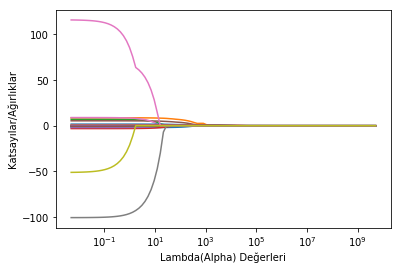

In [8]:
import matplotlib.pyplot as plt
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5

katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha = i)
    lasso.fit(x_train,y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale('log')

plt.axis("tight")
plt.xlabel("Lambda(Alpha) Değerleri")
plt.ylabel('Katsayılar/Ağırlıklar')


In [10]:
#Tahmin

lasso_model.predict(x_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [11]:
y_pred = lasso_model.predict(x_test)

In [12]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.7545270148768

In [13]:
#Model Tuning

from sklearn.linear_model import LassoCV

In [14]:
lasso_cv_model = LassoCV(alphas = None,cv=10,max_iter = 10000,normalize = True)

In [15]:
lasso_cv_model.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [16]:
lasso_cv_model.alpha_

0.39406126432470073

In [17]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [18]:
lasso_tuned.fit(x_train,y_train)

C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.39406126432470073, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
y_pred = lasso_tuned.predict(x_test)

In [21]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.5226376958367